In [1]:
from qiskit import QuantumCircuit,QuantumRegister

In [2]:
qc = QuantumCircuit()

In [3]:
qr = QuantumRegister(2,'a')

In [4]:
qr 

QuantumRegister(2, 'a')

In [5]:
qc.add_register(qr)
qc.qregs

[QuantumRegister(2, 'a')]

In [6]:
qc.draw()

a_0: 
     
a_1:

In [7]:
#add gates
qc.h(qr[0])

In [8]:
#add a controlled-NOT using cx. This requires two arguments: control qubit, and then target qubit.
qc.cx(qr[0], qr[1]);

In [9]:
qc.draw()

┌───┐     
a_0: ┤ H ├──■──
     └───┘┌─┴─┐
a_1: ─────┤ X ├
          └───┘

In [10]:
from qiskit import Aer
sv_sim = Aer.get_backend('aer_simulator')

In [11]:
# list of all possible simulators in Aer
for backend in Aer.backends():
    print(backend)

aer_simulator
aer_simulator_statevector
aer_simulator_density_matrix
aer_simulator_stabilizer
aer_simulator_matrix_product_state
aer_simulator_extended_stabilizer
aer_simulator_unitary
aer_simulator_superop
qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


All of these simulators are 'local', meaning that they run on the
machine on which Qiskit is installed. Using them on your own 
machine can be done without signing up to the IBMQ user agreement.

In [12]:
from qiskit import assemble 


In [13]:
qc.save_statevector()
qobj = assemble(qc)


In [14]:
job = sv_sim.run(qobj)

In [15]:
ket = job.result().get_statevector()

In [16]:
for amplitude in ket:
    print(amplitude)

(0.7071067811865476+0j)
0j
0j
(0.7071067811865476+0j)


This is the vector for a Bell state  

In [18]:
#initialize a circuit with an arbitrary pure state
new_qc = QuantumCircuit(qr)
new_qc.initialize(ket, qr);

In [19]:
#define a two bit classical register, in order to measure both of our two qubits
from qiskit import ClassicalRegister
cr = ClassicalRegister(2, 'creg')
qc.add_register(cr)

In [20]:
qc.measure(qr[0], cr[0])
qc.measure(qr[1], cr[1])

qc.draw()

┌───┐      ░ ┌─┐   
   a_0: ┤ H ├──■───░─┤M├───
        └───┘┌─┴─┐ ░ └╥┘┌─┐
   a_1: ─────┤ X ├─░──╫─┤M├
             └───┘ ░  ║ └╥┘
creg: 2/══════════════╩══╩═
                      0  1

In [21]:
aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(qc, shots=8192)
job = aer_sim.run(qobj)

In [22]:
hist = job.result().get_counts()
print(hist)

{'00': 4105, '11': 4087}


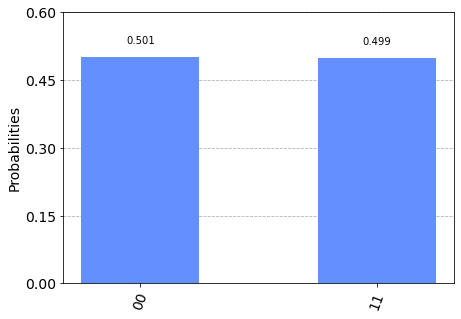

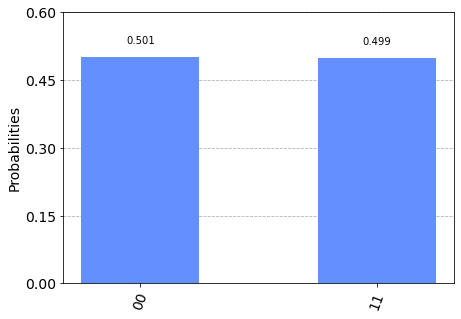

In [24]:
from qiskit.visualization import plot_histogram

plot_histogram(hist)

In [25]:
qobj = assemble(qc, shots=10)
job = aer_sim.run(qobj, memory=True)
samples = job.result().get_memory()
print(samples)

['00', '11', '00', '00', '00', '00', '11', '00', '00', '00']


In [26]:
qubit = QuantumRegister(8)
bit = ClassicalRegister(8)
qc_2 = QuantumCircuit(qubit,bit)

qc_2.x(qubit[7])
qc_2.measure(qubit,bit) # this is a way to do all the qc.measure(qr8[j],cr8[j]) at once

qobj = assemble(qc_2, shots=8192)
aer_sim.run(qobj).result().get_counts()

{'10000000': 8192}

In [27]:
#Creating custom gates

In [29]:
sub_circuit = QuantumCircuit(3, name='toggle_cx')
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)
sub_circuit.cx(0,1)
sub_circuit.cx(1,2)

sub_circuit.draw()

q_0: ──■─────────■───────
     ┌─┴─┐     ┌─┴─┐     
q_1: ┤ X ├──■──┤ X ├──■──
     └───┘┌─┴─┐└───┘┌─┴─┐
q_2: ─────┤ X ├─────┤ X ├
          └───┘     └───┘

In [30]:
toggle_cx = sub_circuit.to_instruction()

In [32]:
qr = QuantumRegister(4)
new_qc = QuantumCircuit(qr)

new_qc.append(toggle_cx, [qr[1],qr[2],qr[3]])

new_qc.draw()

q1_0: ──────────────
      ┌────────────┐
q1_1: ┤0           ├
      │            │
q1_2: ┤1 toggle_cx ├
      │            │
q1_3: ┤2           ├
      └────────────┘